In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'

from kNN import kNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_digits, load_boston
from sklearn.model_selection import GridSearchCV

# k-nearest Neighbour without fine tuning

We will use digits dataset from sklearn for the same. There is reson to use digits dataset. The training data in digits dataset is clustered well and different classes are separated well.<br>
<br>
Due to this k-NN performs better than decision tree on this dataset.<br>
<br>
Below is the t-sne representation of the digits dataset.

In [3]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [4]:
digits = load_digits()

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(digits.data)

In [6]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(X_scaled)

In [7]:
%%time
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(pca_result_50)

CPU times: user 12.6 s, sys: 39.4 ms, total: 12.6 s
Wall time: 12.2 s


In [8]:
target_ids = range(len(digits.target_names))

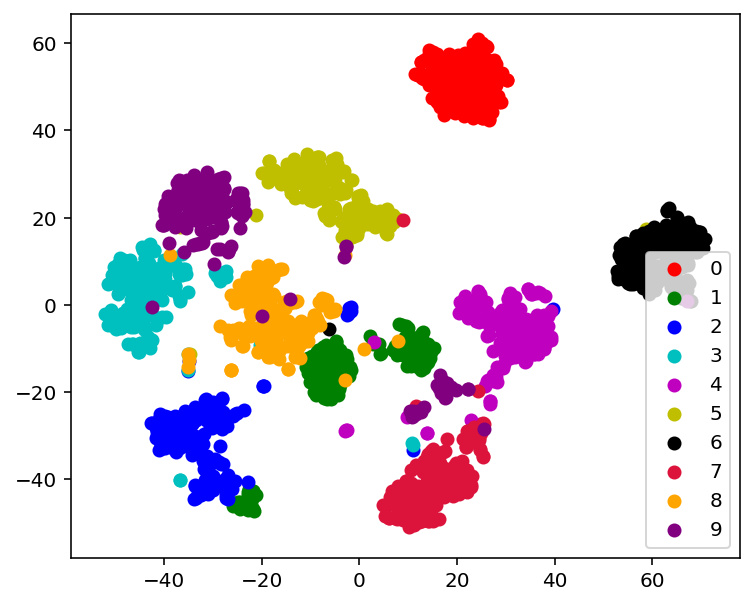

In [9]:
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'crimson', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, digits.target_names):
    plt.scatter(tsne_repr[digits.target == i, 0], tsne_repr[digits.target == i, 1], c=c, label=label)
plt.legend()
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, digits.target, random_state=17, test_size=0.2)

In [11]:
knn = kNN(k=20)

In [12]:
knn.fit(X_train, y_train)

In [13]:
preds = knn.predict(X_test)

In [14]:
accuracy_score(y_test, preds)

0.9666666666666667

In [15]:
conf_mat = confusion_matrix(y_test, preds)

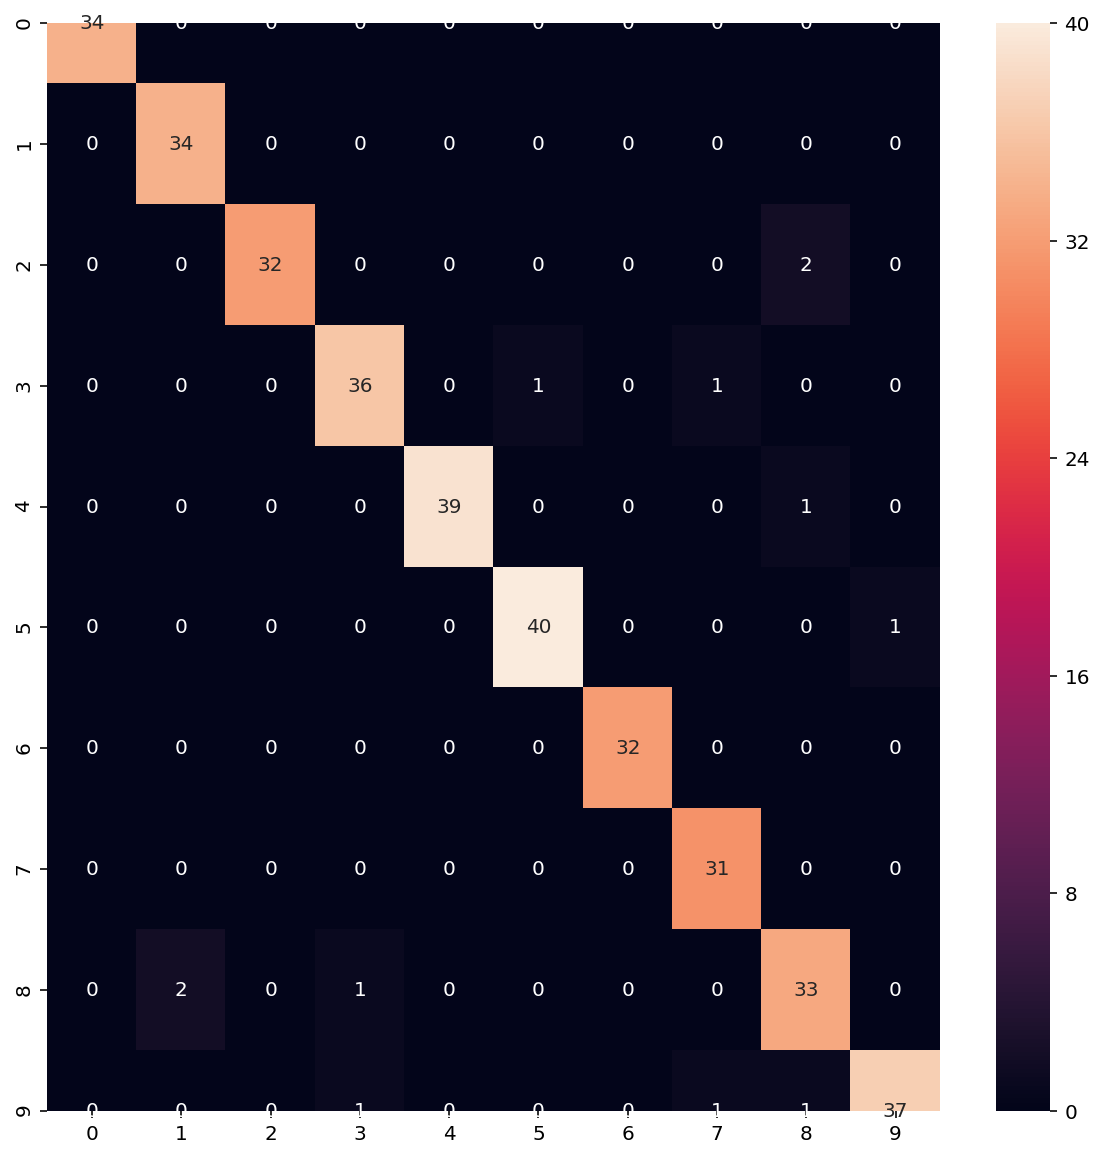

In [16]:
import seaborn as sns

df_cm = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True)

Let's tune the kNN with gridsearch

In [22]:
knn = kNN(classifier=True)
knn_params = {'k': range(10, 500, 20)}
knn_grid = GridSearchCV(knn, knn_params, cv=5, verbose=True, scoring='accuracy')
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    3.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=kNN(classifier=True, k=5), iid='warn', n_jobs=None,
             param_grid={'k': range(10, 500, 20)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='accuracy',
             verbose=True)

In [23]:
knn_grid.best_params_, knn_grid.best_score_

({'k': 10}, 0.9603340292275574)

In [24]:
preds_grid = knn_grid.predict(X_test)

In [25]:
accuracy_score(y_test, preds_grid)

0.9805555555555555

In [26]:
conf_mat = confusion_matrix(y_test, preds_grid)

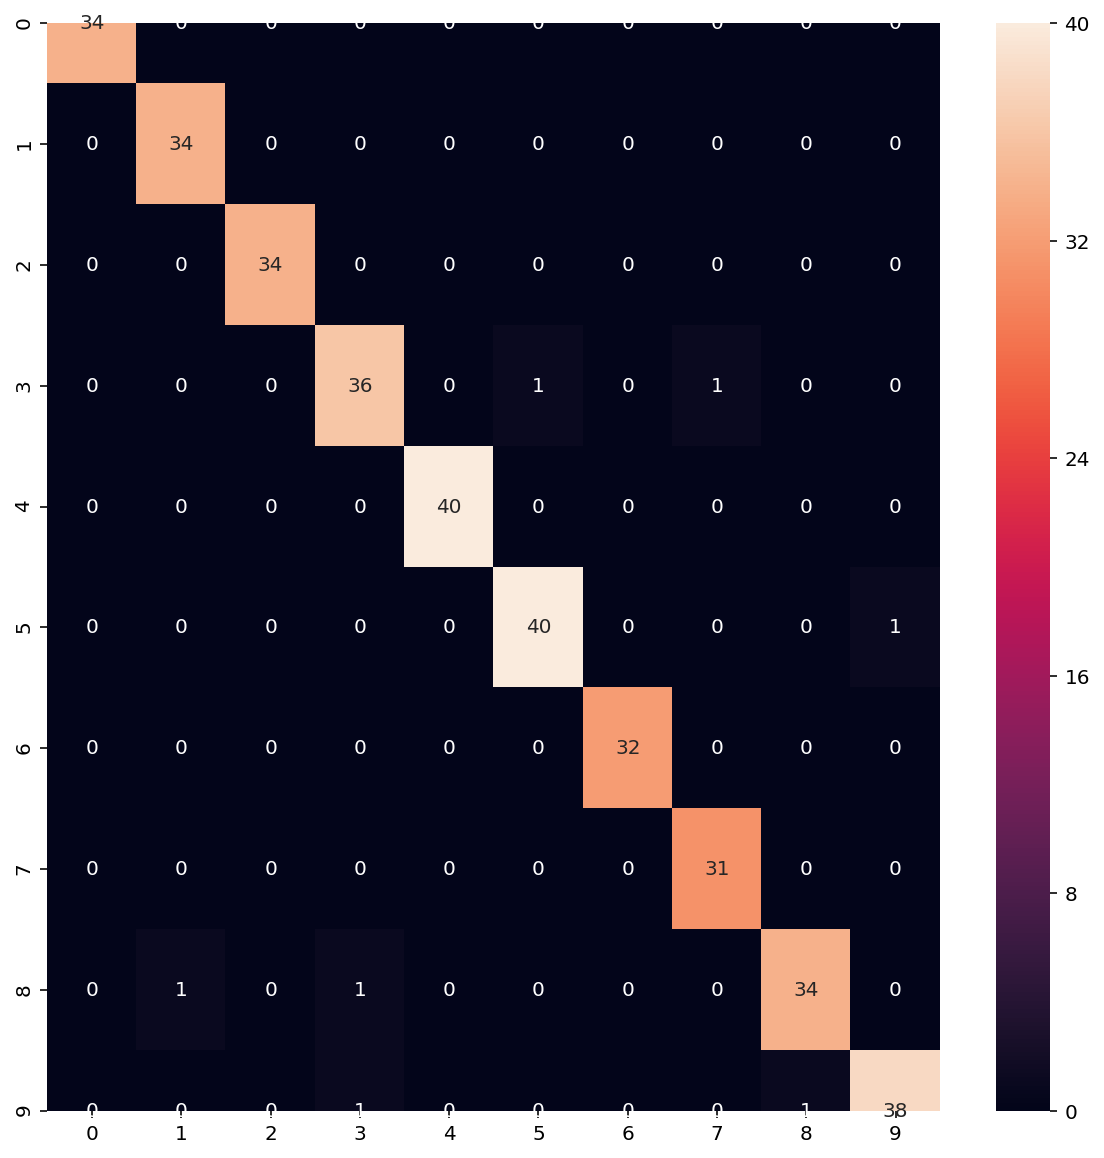

In [27]:
df_cm = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True)

# KNN Regression Example

For regression, we'll predict the estimator will return the average value from the cluster.

In [28]:
ds = load_boston()

In [29]:
scalar = StandardScaler()

In [30]:
ds_scaled = scalar.fit_transform(ds.data)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(ds_scaled, ds.target, random_state=17, test_size=0.2)

In [32]:
knn = kNN(k=10, classifier=False)

In [33]:
knn.fit(X_train, y_train)

In [34]:
preds = knn.predict(X_test)

In [35]:
preds

[29.490000000000002,
 24.68,
 18.889999999999997,
 42.059999999999995,
 23.479999999999997,
 21.1,
 36.489999999999995,
 23.650000000000002,
 10.94,
 25.44,
 23.490000000000002,
 19.68,
 29.03,
 12.41,
 25.74,
 18.799999999999997,
 22.86,
 11.43,
 21.91,
 17.97,
 29.060000000000002,
 23.66,
 16.68,
 14.98,
 23.729999999999997,
 36.739999999999995,
 15.969999999999999,
 11.68,
 18.76,
 23.550000000000004,
 22.91,
 22.38,
 21.98,
 22.13,
 26.45,
 17.32,
 35.1,
 10.03,
 20.32,
 37.88,
 10.440000000000001,
 25.889999999999997,
 23.330000000000002,
 25.060000000000002,
 16.68,
 12.920000000000002,
 33.77,
 26.68,
 19.839999999999996,
 15.959999999999999,
 21.89,
 13.330000000000002,
 25.910000000000004,
 18.55,
 18.5,
 16.68,
 19.34,
 24.32,
 37.81999999999999,
 25.02,
 22.309999999999995,
 21.490000000000002,
 20.85,
 16.68,
 17.16,
 23.67,
 24.080000000000002,
 30.310000000000002,
 27.660000000000004,
 22.52,
 29.97,
 16.82,
 28.559999999999995,
 37.82,
 10.39,
 26.77,
 23.04,
 23.68,
 17

In [36]:
mean_squared_error(y_test, preds)

20.98120294117648

### Some grid search

In [39]:
knn = kNN(classifier=False)
knn_params = {'k': [1, 2, 5] + list(range(10, 150, 20))}
knn_grid = GridSearchCV(knn, knn_params, cv=5, verbose=True, scoring='neg_mean_squared_error')
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
/home/nachiket273/anaconda3/envs/pytorch1/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=kNN(classifier=False, k=5), iid='warn', n_jobs=None,
             param_grid={'k': [1, 2, 5, 10, 30, 50, 70, 90, 110, 130]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=True)

In [40]:
knn_grid.best_params_, knn_grid.best_score_

({'k': 2}, -18.958620049504948)

In [41]:
preds_gs = knn_grid.predict(X_test)

In [42]:
mean_squared_error(y_test, preds_gs)

17.822181372549014